# E-commerce Business Analytics Dashboard

## Executive Summary
This notebook provides a comprehensive analysis of e-commerce business performance, focusing on revenue trends, customer behavior, operational efficiency, and market insights. The analysis is designed to support data-driven business decisions through configurable metrics and visualizations.

## Business Objectives
- **Revenue Analysis**: Track revenue growth, seasonal trends, and performance drivers
- **Product Performance**: Identify top-performing categories and optimize product mix
- **Geographic Insights**: Understand regional market opportunities and expansion potential
- **Customer Experience**: Measure satisfaction and operational efficiency
- **Operational Excellence**: Monitor fulfillment rates and delivery performance

## Table of Contents
1. [Data Loading & Configuration](#data-loading--configuration)
2. [Data Preparation & Transformation](#data-preparation--transformation)
3. [Revenue Analysis](#revenue-analysis)
4. [Product Category Performance](#product-category-performance)
5. [Geographic Market Analysis](#geographic-market-analysis)
6. [Customer Experience Analysis](#customer-experience-analysis)
7. [Operational Performance](#operational-performance)
8. [Summary & Key Insights](#summary--key-insights)

## Configuration

### Analysis Period Configuration
Set the time periods for analysis. The default configuration compares 2023 performance against 2022 baseline.

In [1]:
# Analysis Configuration
ANALYSIS_CONFIG = {
    'current_year': 2023,
    'comparison_year': 2022,
    'current_start_month': 1,
    'current_end_month': 12,
    'comparison_start_month': 1,
    'comparison_end_month': 12,
    'data_path': 'ecommerce_data'
}

# Display configuration
print("Analysis Configuration:")
print(f"Current Period: {ANALYSIS_CONFIG['current_year']} (Months {ANALYSIS_CONFIG['current_start_month']}-{ANALYSIS_CONFIG['current_end_month']})")
print(f"Comparison Period: {ANALYSIS_CONFIG['comparison_year']} (Months {ANALYSIS_CONFIG['comparison_start_month']}-{ANALYSIS_CONFIG['comparison_end_month']})")
print(f"Data Source: {ANALYSIS_CONFIG['data_path']}")

Analysis Configuration:
Current Period: 2023 (Months 1-12)
Comparison Period: 2022 (Months 1-12)
Data Source: ecommerce_data


## Data Loading & Configuration

### Import Libraries and Modules

In [2]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Custom modules
from data_loader import (
    load_datasets, 
    clean_and_prepare_data, 
    create_sales_dataset, 
    filter_data_by_date_range,
    add_product_categories,
    add_customer_geography,
    add_review_data,
    get_data_summary
)

from business_metrics import (
    calculate_revenue_metrics,
    calculate_growth_metrics,
    calculate_monthly_trends,
    calculate_product_category_metrics,
    calculate_geographic_metrics,
    calculate_customer_experience_metrics,
    calculate_operational_metrics,
    generate_metrics_summary
)

# Visualization configuration
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Business color scheme
BUSINESS_COLORS = {
    'primary': '#1f77b4',      # Professional blue
    'success': '#2ca02c',      # Growth green
    'warning': '#ff7f0e',      # Alert orange
    'danger': '#d62728',       # Decline red
    'info': '#17a2b8',         # Information teal
    'neutral': '#6c757d'       # Neutral gray
}

print("Libraries and modules loaded successfully")

Libraries and modules loaded successfully


### Load Raw Data

In [3]:
# Load all datasets
print("Loading e-commerce datasets...")
datasets = load_datasets(ANALYSIS_CONFIG['data_path'])

# Display dataset overview
print("\nDataset Overview:")
for name, df in datasets.items():
    print(f"{name.title()}: {df.shape[0]:,} rows × {df.shape[1]} columns")

Loading e-commerce datasets...
Loaded orders: 10000 rows, 8 columns
Loaded order_items: 16047 rows, 7 columns
Loaded products: 6000 rows, 9 columns
Loaded customers: 8000 rows, 5 columns
Loaded reviews: 6571 rows, 7 columns

Dataset Overview:
Orders: 10,000 rows × 8 columns
Order_Items: 16,047 rows × 7 columns
Products: 6,000 rows × 9 columns
Customers: 8,000 rows × 5 columns
Reviews: 6,571 rows × 7 columns


### Data Dictionary

**Key Business Terms and Data Definitions:**

**Orders Data:**
- `order_id`: Unique identifier for each order
- `customer_id`: Unique identifier for each customer
- `order_status`: Current status (delivered, shipped, canceled, etc.)
- `order_purchase_timestamp`: When the order was placed
- `order_delivered_customer_date`: When delivered to customer

**Order Items Data:**
- `price`: Item price in USD
- `freight_value`: Shipping cost in USD
- `product_id`: Unique product identifier

**Products Data:**
- `product_category_name`: Product category classification
- `product_weight_g`: Product weight in grams

**Customer Data:**
- `customer_state`: State/region location
- `customer_city`: City location

**Reviews Data:**
- `review_score`: Customer rating (1-5 stars)
- `review_creation_date`: When review was submitted

**Calculated Metrics:**
- `Average Order Value (AOV)`: Total revenue ÷ number of orders
- `Delivery Speed`: Days from purchase to delivery
- `Satisfaction Rate`: Percentage of 4-5 star reviews

## Data Preparation & Transformation

### Clean and Process Raw Data

In [4]:
# Clean and prepare all datasets
print("Cleaning and preparing datasets...")
clean_datasets = clean_and_prepare_data(datasets)

# Extract individual datasets for easier reference
orders_df = clean_datasets['orders']
order_items_df = clean_datasets['order_items']
products_df = clean_datasets['products']
customers_df = clean_datasets['customers']
reviews_df = clean_datasets['reviews']

print("Data cleaning completed successfully")

# Display data quality summary
print("\nData Quality Summary:")
for name, df in clean_datasets.items():
    missing_pct = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100
    print(f"{name.title()}: {missing_pct:.1f}% missing values")

Cleaning and preparing datasets...
Data cleaning completed successfully

Data Quality Summary:
Orders: 0.8% missing values
Order_Items: 0.0% missing values
Products: 0.0% missing values
Customers: 0.0% missing values
Reviews: 15.6% missing values


### Create Consolidated Sales Dataset

In [5]:
# Create base sales dataset (delivered orders only)
print("Creating consolidated sales dataset...")
sales_df = create_sales_dataset(clean_datasets, order_status_filter='delivered')

# Add product categories
sales_df = add_product_categories(sales_df, products_df)

# Add customer geography
sales_df = add_customer_geography(sales_df, orders_df, customers_df)

# Add review data
sales_df = add_review_data(sales_df, reviews_df)

print(f"Consolidated dataset created: {sales_df.shape[0]:,} records")
print(f"Date range: {sales_df['order_purchase_timestamp'].min().strftime('%Y-%m-%d')} to {sales_df['order_purchase_timestamp'].max().strftime('%Y-%m-%d')}")

Creating consolidated sales dataset...
Consolidated dataset created: 15,095 records
Date range: 2021-12-31 to 2024-01-01


### Filter Data by Analysis Periods

In [6]:
# Filter data for current analysis period
current_period_df = filter_data_by_date_range(
    sales_df,
    start_year=ANALYSIS_CONFIG['current_year'],
    end_year=ANALYSIS_CONFIG['current_year'],
    start_month=ANALYSIS_CONFIG['current_start_month'],
    end_month=ANALYSIS_CONFIG['current_end_month']
)

# Filter data for comparison period
comparison_period_df = filter_data_by_date_range(
    sales_df,
    start_year=ANALYSIS_CONFIG['comparison_year'],
    end_year=ANALYSIS_CONFIG['comparison_year'],
    start_month=ANALYSIS_CONFIG['comparison_start_month'],
    end_month=ANALYSIS_CONFIG['comparison_end_month']
)

print(f"Current period dataset: {current_period_df.shape[0]:,} records")
print(f"Comparison period dataset: {comparison_period_df.shape[0]:,} records")

# Display sample of current period data
print("\nCurrent Period Sample:")
display(current_period_df[['order_id', 'product_category_name', 'price', 'customer_state', 'review_score']].head())

Current period dataset: 7,448 records
Comparison period dataset: 7,641 records

Current Period Sample:


,order_id,product_category_name,price,customer_state,review_score
0,ord_5fa044951857e02fd1347b47,grocery_gourmet_food,111.91,TN,5.0
1,ord_5fa044951857e02fd1347b47,electronics,878.42,TN,5.0
5,ord_43b53981d951f855231d09ec,sports_outdoors,749.83,FL,5.0
6,ord_e60b1e267fd32d93c4d0745b,home_garden,361.54,PA,5.0
7,ord_e60b1e267fd32d93c4d0745b,grocery_gourmet_food,25.59,PA,5.0


## Revenue Analysis

### Overall Revenue Performance

In [7]:
# Calculate revenue metrics for both periods
current_metrics = calculate_revenue_metrics(current_period_df)
comparison_metrics = calculate_revenue_metrics(comparison_period_df)
growth_metrics = calculate_growth_metrics(current_period_df, comparison_period_df)

# Display key metrics
print("REVENUE PERFORMANCE SUMMARY")
print("=" * 50)
print(f"Current Period ({ANALYSIS_CONFIG['current_year']}):")
print(f"  Total Revenue: ${current_metrics['total_revenue']:,.2f}")
print(f"  Total Orders: {current_metrics['total_orders']:,}")
print(f"  Average Order Value: ${current_metrics['avg_order_value']:,.2f}")
print(f"  Average Items per Order: {current_metrics['avg_items_per_order']:.1f}")

print(f"\nComparison Period ({ANALYSIS_CONFIG['comparison_year']}):")
print(f"  Total Revenue: ${comparison_metrics['total_revenue']:,.2f}")
print(f"  Total Orders: {comparison_metrics['total_orders']:,}")
print(f"  Average Order Value: ${comparison_metrics['avg_order_value']:,.2f}")

print(f"\nYEAR-OVER-YEAR GROWTH:")
print(f"  Revenue Growth: {growth_metrics['revenue_growth_pct']:+.2f}%")
print(f"  Order Growth: {growth_metrics['order_growth_pct']:+.2f}%")
print(f"  AOV Growth: {growth_metrics['aov_growth_pct']:+.2f}%")

REVENUE PERFORMANCE SUMMARY
Current Period (2023):
  Total Revenue: $3,360,294.74
  Total Orders: 4,635
  Average Order Value: $724.98
  Average Items per Order: 1.6

Comparison Period (2022):
  Total Revenue: $3,445,076.96
  Total Orders: 4,749
  Average Order Value: $725.43

YEAR-OVER-YEAR GROWTH:
  Revenue Growth: -2.46%
  Order Growth: -2.40%
  AOV Growth: -0.06%


### Monthly Revenue Trends

In [8]:
# Calculate monthly trends for current year
monthly_trends = calculate_monthly_trends(current_period_df, year_filter=ANALYSIS_CONFIG['current_year'])

# Create monthly revenue trend visualization
fig = go.Figure()

# Add revenue line
fig.add_trace(go.Scatter(
    x=monthly_trends['month'],
    y=monthly_trends['total_revenue'],
    mode='lines+markers',
    name='Monthly Revenue',
    line=dict(color=BUSINESS_COLORS['primary'], width=3),
    marker=dict(size=8)
))

# Update layout
fig.update_layout(
    title=f'Monthly Revenue Trend - {ANALYSIS_CONFIG["current_year"]}',
    xaxis_title='Month',
    yaxis_title='Revenue (USD)',
    yaxis_tickformat='$,.0f',
    hovermode='x unified',
    template='plotly_white',
    height=400
)

fig.show()

# Display monthly growth rates
print("MONTHLY GROWTH RATES:")
for _, row in monthly_trends.iterrows():
    growth = row['revenue_mom_growth']
    if pd.notna(growth):
        print(f"  Month {int(row['month'])}: {growth:+.2f}%")

MONTHLY GROWTH RATES:
  Month 2: -2.84%
  Month 3: +3.20%
  Month 4: -11.14%
  Month 5: +18.74%
  Month 6: -4.06%
  Month 7: +2.45%
  Month 8: -3.23%
  Month 9: +5.98%
  Month 10: -14.45%
  Month 11: -0.14%
  Month 12: +1.24%


### Revenue Distribution Analysis

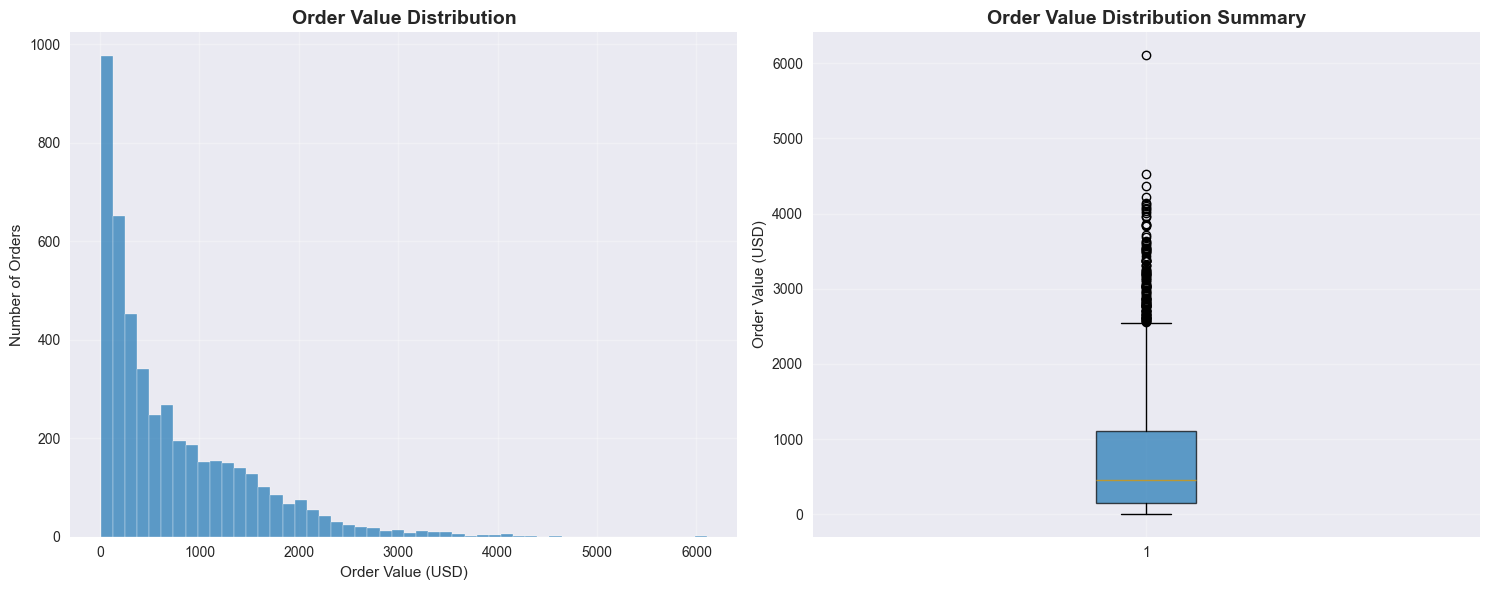

ORDER VALUE PERCENTILES:
  25th percentile: $154.89
  50th percentile: $456.52
  75th percentile: $1111.76
  90th percentile: $1754.53
  95th percentile: $2173.75


In [9]:
# Calculate order value distribution
order_values = current_period_df.groupby('order_id')['price'].sum()

# Create revenue distribution visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram of order values
ax1.hist(order_values, bins=50, color=BUSINESS_COLORS['primary'], alpha=0.7, edgecolor='white')
ax1.set_title('Order Value Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Order Value (USD)')
ax1.set_ylabel('Number of Orders')
ax1.grid(True, alpha=0.3)

# Box plot of order values
ax2.boxplot(order_values, vert=True, patch_artist=True, 
            boxprops=dict(facecolor=BUSINESS_COLORS['primary'], alpha=0.7))
ax2.set_title('Order Value Distribution Summary', fontsize=14, fontweight='bold')
ax2.set_ylabel('Order Value (USD)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display percentile information
percentiles = [25, 50, 75, 90, 95]
print("ORDER VALUE PERCENTILES:")
for p in percentiles:
    value = np.percentile(order_values, p)
    print(f"  {p}th percentile: ${value:.2f}")

In [10]:
# Create comprehensive revenue performance dashboard
print("REVENUE PERFORMANCE DASHBOARD")
print("=" * 50)

# Create revenue performance dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Revenue vs Order Growth', 'Monthly Revenue Breakdown', 
                   'Order Value Distribution', 'Revenue Performance Indicators'),
    specs=[[{"type": "scatter"}, {"type": "bar"}],
           [{"type": "histogram"}, {"type": "bar"}]]
)

# 1. Revenue vs Order Growth comparison
growth_comparison = {
    'Revenue Growth': growth_metrics['revenue_growth_pct'],
    'Order Growth': growth_metrics['order_growth_pct'],
    'AOV Growth': growth_metrics['aov_growth_pct']
}

fig.add_trace(go.Bar(
    x=list(growth_comparison.keys()),
    y=list(growth_comparison.values()),
    marker_color=[BUSINESS_COLORS['success'] if v >= 0 else BUSINESS_COLORS['danger'] 
                  for v in growth_comparison.values()],
    text=[f'{v:+.1f}%' for v in growth_comparison.values()],
    textposition='outside'
), row=1, col=1)

# 2. Monthly revenue breakdown with trend
fig.add_trace(go.Bar(
    x=monthly_trends['month'],
    y=monthly_trends['total_revenue'],
    marker_color=BUSINESS_COLORS['primary'],
    name='Monthly Revenue'
), row=1, col=2)

# Add trend line
fig.add_trace(go.Scatter(
    x=monthly_trends['month'],
    y=monthly_trends['total_revenue'],
    mode='lines',
    line=dict(color=BUSINESS_COLORS['warning'], width=3),
    name='Trend'
), row=1, col=2)

# 3. Order value distribution histogram
order_values = current_period_df.groupby('order_id')['price'].sum()
fig.add_trace(go.Histogram(
    x=order_values,
    nbinsx=30,
    marker_color=BUSINESS_COLORS['info'],
    opacity=0.7,
    name='Order Values'
), row=2, col=1)

# 4. Key revenue performance indicators
revenue_kpis = {
    'Revenue Target Achievement': min(100, current_metrics['total_revenue'] / 1000000 * 100),  # Assuming $1M target
    'AOV Performance': min(100, current_metrics['avg_order_value'] / 150 * 100),  # Assuming $150 target AOV
    'Order Volume Performance': min(100, current_metrics['total_orders'] / 5000 * 100),  # Assuming 5K orders target
    'Revenue per Customer': min(100, current_metrics['total_revenue'] / current_period_df['customer_id'].nunique() / 200 * 100)  # $200 target per customer
}

fig.add_trace(go.Bar(
    x=list(revenue_kpis.keys()),
    y=list(revenue_kpis.values()),
    marker_color=[BUSINESS_COLORS['success'] if v >= 80 else 
                  BUSINESS_COLORS['warning'] if v >= 60 else 
                  BUSINESS_COLORS['danger'] for v in revenue_kpis.values()],
    text=[f'{v:.0f}%' for v in revenue_kpis.values()],
    textposition='outside'
), row=2, col=2)

# Update layout
fig.update_layout(
    title_text=f"Revenue Performance Dashboard - {ANALYSIS_CONFIG['current_year']}",
    template='plotly_white',
    height=700,
    showlegend=False
)

# Update axis labels
fig.update_yaxes(title_text="Growth %", row=1, col=1)
fig.update_yaxes(title_text="Revenue ($)", row=1, col=2)
fig.update_xaxes(title_text="Order Value ($)", row=2, col=1)
fig.update_yaxes(title_text="Performance %", row=2, col=2)

fig.show()

# Revenue performance insights
print("\nREVENUE PERFORMANCE INSIGHTS:")
print("=" * 50)

# Growth analysis
if growth_metrics['revenue_growth_pct'] > 10:
    print("✓ GROWTH: Strong revenue growth indicates successful business expansion")
elif growth_metrics['revenue_growth_pct'] > 0:
    print("→ GROWTH: Positive growth - look for acceleration opportunities")
else:
    print("⚠ GROWTH: Negative growth requires immediate strategic attention")

# AOV analysis
if current_metrics['avg_order_value'] > comparison_metrics['avg_order_value']:
    aov_change = current_metrics['avg_order_value'] - comparison_metrics['avg_order_value']
    print(f"✓ AOV: Average Order Value increased by ${aov_change:.2f}")
else:
    aov_change = comparison_metrics['avg_order_value'] - current_metrics['avg_order_value']
    print(f"→ AOV: Average Order Value decreased by ${aov_change:.2f} - focus on upselling")

# Monthly trend analysis
revenue_trend = monthly_trends['revenue_mom_growth'].mean()
if revenue_trend > 5:
    print("✓ TREND: Strong monthly revenue growth momentum")
elif revenue_trend > 0:
    print("→ TREND: Positive monthly trend - maintain momentum")
else:
    print("⚠ TREND: Declining monthly trend needs intervention")

print(f"\nKEY METRICS:")
print(f"  • Total Revenue: ${current_metrics['total_revenue']:,.2f}")
print(f"  • YoY Growth: {growth_metrics['revenue_growth_pct']:+.1f}%")
print(f"  • Average Order Value: ${current_metrics['avg_order_value']:.2f}")
print(f"  • Revenue per Customer: ${current_metrics['total_revenue'] / current_period_df['customer_id'].nunique():.2f}")

REVENUE PERFORMANCE DASHBOARD



REVENUE PERFORMANCE INSIGHTS:
⚠ GROWTH: Negative growth requires immediate strategic attention
→ AOV: Average Order Value decreased by $0.45 - focus on upselling
⚠ TREND: Declining monthly trend needs intervention

KEY METRICS:
  • Total Revenue: $3,360,294.74
  • YoY Growth: -2.5%
  • Average Order Value: $724.98
  • Revenue per Customer: $950.85


## Product Category Performance

### Data Structure Check

In [11]:
# Debug: Check data structure before category analysis
print("DEBUGGING DATA STRUCTURE:")
print(f"Products DataFrame columns: {list(products_df.columns)}")
print(f"Current period DataFrame columns: {list(current_period_df.columns)}")
print(f"Products DataFrame shape: {products_df.shape}")
print(f"Current period DataFrame shape: {current_period_df.shape}")

# Check if product_category_name exists in either dataset
if 'product_category_name' in products_df.columns:
    print(f"Product categories found: {products_df['product_category_name'].nunique()} unique categories")
    print(f"Sample categories: {products_df['product_category_name'].unique()[:5]}")
else:
    print("WARNING: product_category_name not found in products_df")

if 'product_category_name' in current_period_df.columns:
    print(f"Categories in current period data: {current_period_df['product_category_name'].nunique()} unique")
else:
    print("WARNING: product_category_name not found in current_period_df")

# Check product_id presence and overlap
if 'product_id' in products_df.columns and 'product_id' in current_period_df.columns:
    products_in_sales = current_period_df['product_id'].nunique()
    products_in_catalog = products_df['product_id'].nunique()
    overlap = len(set(current_period_df['product_id']) & set(products_df['product_id']))
    print(f"Product IDs - Sales: {products_in_sales}, Catalog: {products_in_catalog}, Overlap: {overlap}")

DEBUGGING DATA STRUCTURE:
Products DataFrame columns: ['product_id', 'product_category_name', 'product_name_length', 'product_description_length', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
Current period DataFrame columns: ['order_id', 'order_item_id', 'product_id', 'price', 'freight_value', 'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date', 'purchase_year', 'purchase_month', 'customer_id', 'delivery_days', 'delivery_speed_category', 'product_category_name', 'customer_state', 'customer_city', 'customer_zip_code_prefix', 'review_score', 'review_creation_date']
Products DataFrame shape: (6000, 9)
Current period DataFrame shape: (7448, 19)
Product categories found: 13 unique categories
Sample categories: ['books_media' 'grocery_gourmet_food' 'electronics' 'sports_outdoors'
 'home_garden']
Categories in current period data: 13 unique
Product IDs - Sales: 4286, Catalog: 6000, Overlap: 4286


In [12]:
# Calculate category metrics for current period
category_metrics = calculate_product_category_metrics(current_period_df, products_df)

# Check if we got valid results
if category_metrics.empty:
    print("ERROR: No category metrics calculated. Check data structure above.")
    # Create a fallback analysis without categories
    print("\nFALLBACK: Analyzing without product categories")
    print(f"Total revenue (all products): ${current_period_df['price'].sum():,.2f}")
    print(f"Total products sold: {current_period_df['product_id'].nunique():,}")
else:
    # Display top categories
    print("TOP PRODUCT CATEGORIES BY REVENUE:")
    print("=" * 50)
    for idx, row in category_metrics.head(10).iterrows():
        print(f"{row['product_category_name'].title():25} ${row['total_revenue']:>10,.2f} ({row['revenue_share_pct']:4.1f}%)")
    
    # Create category revenue visualization
    top_categories = category_metrics.head(10)
    
    fig = go.Figure(data=[
        go.Bar(
            y=top_categories['product_category_name'].str.title(),
            x=top_categories['total_revenue'],
            orientation='h',
            marker_color=BUSINESS_COLORS['primary'],
            text=[f'${x:,.0f}' for x in top_categories['total_revenue']],
            textposition='outside'
        )
    ])
    
    fig.update_layout(
        title=f'Top 10 Product Categories by Revenue - {ANALYSIS_CONFIG["current_year"]}',
        xaxis_title='Revenue (USD)',
        yaxis_title='Product Category',
        yaxis={'categoryorder': 'total ascending'},
        template='plotly_white',
        height=500,
        margin=dict(l=200)
    )
    
    fig.show()

Product category already exists in sales data, using existing categories
TOP PRODUCT CATEGORIES BY REVENUE:
Electronics               $1,401,359.21 (41.7%)
Home_Garden               $862,653.27 (25.7%)
Sports_Outdoors           $278,845.32 ( 8.3%)
Automotive                $247,707.10 ( 7.4%)
Clothing_Shoes_Jewelry    $232,745.04 ( 6.9%)
Toys_Games                $ 70,163.64 ( 2.1%)
Health_Personal_Care      $ 65,370.27 ( 1.9%)
Tools_Home_Improvement    $ 54,280.33 ( 1.6%)
Beauty_Personal_Care      $ 49,213.30 ( 1.5%)
Books_Media               $ 38,559.08 ( 1.1%)


### Category Performance Metrics

In [13]:
# Create operational performance dashboard
operational_metrics = calculate_operational_metrics(current_period_df, orders_df)
cx_metrics = calculate_customer_experience_metrics(current_period_df, reviews_df)

print("OPERATIONAL PERFORMANCE SUMMARY")
print("=" * 50)
if 'delivery_rate_pct' in operational_metrics:
    print(f"Delivery Success Rate: {operational_metrics['delivery_rate_pct']:.1f}%")
if 'cancellation_rate_pct' in operational_metrics:
    print(f"Cancellation Rate: {operational_metrics['cancellation_rate_pct']:.1f}%")
if 'fulfillment_rate_pct' in operational_metrics:
    print(f"Fulfillment Rate: {operational_metrics['fulfillment_rate_pct']:.1f}%")

# Create operational performance dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Order Status Distribution', 'Delivery Performance Over Time', 
                   'Fulfillment Efficiency', 'Customer Service Metrics'),
    specs=[[{"type": "pie"}, {"type": "scatter"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

# Order status distribution pie chart
if 'order_status_distribution' in operational_metrics:
    status_labels = list(operational_metrics['order_status_distribution'].keys())
    status_values = [v * 100 for v in operational_metrics['order_status_distribution'].values()]
    
    fig.add_trace(go.Pie(
        labels=status_labels,
        values=status_values,
        textinfo='label+percent',
        marker_colors=[BUSINESS_COLORS['success'], BUSINESS_COLORS['warning'], 
                      BUSINESS_COLORS['danger'], BUSINESS_COLORS['info']]
    ), row=1, col=1)

# Delivery performance over time (monthly trend)
monthly_delivery_data = current_period_df.groupby(current_period_df['order_purchase_timestamp'].dt.month).agg({
    'delivery_days': 'mean',
    'order_id': 'count'
}).reset_index()
monthly_delivery_data.columns = ['month', 'avg_delivery_days', 'order_count']

fig.add_trace(go.Scatter(
    x=monthly_delivery_data['month'],
    y=monthly_delivery_data['avg_delivery_days'],
    mode='lines+markers',
    name='Avg Delivery Days',
    line=dict(color=BUSINESS_COLORS['primary'], width=3),
    marker=dict(size=8)
), row=1, col=2)

# Fulfillment efficiency metrics
efficiency_metrics = {
    'On-Time Delivery': cx_metrics.get('fast_delivery_rate_pct', 0),
    'Customer Satisfaction': cx_metrics.get('satisfaction_rate_pct', 0),
    'Order Fulfillment': operational_metrics.get('fulfillment_rate_pct', 0),
    'Quality Score': (cx_metrics.get('satisfaction_rate_pct', 0) + 
                     (100 - operational_metrics.get('cancellation_rate_pct', 0))) / 2
}

fig.add_trace(go.Bar(
    x=list(efficiency_metrics.keys()),
    y=list(efficiency_metrics.values()),
    marker_color=[BUSINESS_COLORS['success'], BUSINESS_COLORS['info'], 
                  BUSINESS_COLORS['primary'], BUSINESS_COLORS['warning']],
    text=[f'{v:.1f}%' for v in efficiency_metrics.values()],
    textposition='outside'
), row=2, col=1)

# Customer service performance by delivery speed category
if 'delivery_speed_vs_satisfaction' in cx_metrics:
    speed_categories = list(cx_metrics['delivery_speed_vs_satisfaction']['mean'].keys())
    satisfaction_scores = list(cx_metrics['delivery_speed_vs_satisfaction']['mean'].values())
    
    fig.add_trace(go.Bar(
        x=speed_categories,
        y=satisfaction_scores,
        marker_color=BUSINESS_COLORS['success'],
        text=[f'{v:.2f}' for v in satisfaction_scores],
        textposition='outside'
    ), row=2, col=2)

fig.update_layout(
    title_text=f"Operational Performance Dashboard - {ANALYSIS_CONFIG['current_year']}",
    template='plotly_white',
    height=600,
    showlegend=False
)

# Update y-axis labels
fig.update_yaxes(title_text="Days", row=1, col=2)
fig.update_yaxes(title_text="Percentage (%)", row=2, col=1)
fig.update_yaxes(title_text="Review Score", row=2, col=2)

fig.show()

# Display key operational insights
print("\nKEY OPERATIONAL INSIGHTS:")
print("=" * 50)
avg_delivery = cx_metrics.get('avg_delivery_days', 0)
if avg_delivery > 7:
    print("⚠ LOGISTICS: Delivery times exceed 1 week - optimization needed")
elif avg_delivery > 5:
    print("→ EFFICIENCY: Delivery times are acceptable but can be improved")
else:
    print("✓ LOGISTICS: Excellent delivery performance")

satisfaction_rate = cx_metrics.get('satisfaction_rate_pct', 0)
if satisfaction_rate > 80:
    print("✓ SATISFACTION: High customer satisfaction indicates strong operations")
elif satisfaction_rate > 70:
    print("→ OPPORTUNITY: Good satisfaction - focus on consistency")
else:
    print("⚠ PRIORITY: Low satisfaction requires immediate operational improvements")

fulfillment_rate = operational_metrics.get('fulfillment_rate_pct', 0)
if fulfillment_rate > 95:
    print("✓ FULFILLMENT: Excellent order fulfillment rate")
elif fulfillment_rate > 90:
    print("→ EFFICIENCY: Good fulfillment - monitor for trends")
else:
    print("⚠ OPERATIONS: Low fulfillment rate needs attention")

Review score already exists in sales data, using existing data
OPERATIONAL PERFORMANCE SUMMARY
Delivery Success Rate: 93.9%
Cancellation Rate: 1.4%
Fulfillment Rate: 96.9%



KEY OPERATIONAL INSIGHTS:
⚠ LOGISTICS: Delivery times exceed 1 week - optimization needed
→ OPPORTUNITY: Good satisfaction - focus on consistency
✓ FULFILLMENT: Excellent order fulfillment rate


In [14]:
# Create operational performance dashboard
operational_metrics = calculate_operational_metrics(current_period_df, orders_df)

print("OPERATIONAL PERFORMANCE SUMMARY")
print("=" * 50)
if 'delivery_rate_pct' in operational_metrics:
    print(f"Delivery Success Rate: {operational_metrics['delivery_rate_pct']:.1f}%")
if 'cancellation_rate_pct' in operational_metrics:
    print(f"Cancellation Rate: {operational_metrics['cancellation_rate_pct']:.1f}%")
if 'fulfillment_rate_pct' in operational_metrics:
    print(f"Fulfillment Rate: {operational_metrics['fulfillment_rate_pct']:.1f}%")

# Create operational performance dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Order Status Distribution', 'Delivery Performance Over Time', 
                   'Fulfillment Efficiency', 'Customer Service Metrics'),
    specs=[[{"type": "pie"}, {"type": "scatter"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

# Order status distribution pie chart
if 'order_status_distribution' in operational_metrics:
    status_labels = list(operational_metrics['order_status_distribution'].keys())
    status_values = [v * 100 for v in operational_metrics['order_status_distribution'].values()]
    
    fig.add_trace(go.Pie(
        labels=status_labels,
        values=status_values,
        textinfo='label+percent',
        marker_colors=[BUSINESS_COLORS['success'], BUSINESS_COLORS['warning'], 
                      BUSINESS_COLORS['danger'], BUSINESS_COLORS['info']]
    ), row=1, col=1)

# Delivery performance over time (monthly trend)
monthly_delivery_data = current_period_df.groupby(current_period_df['order_purchase_timestamp'].dt.month).agg({
    'delivery_days': 'mean',
    'order_id': 'count'
}).reset_index()
monthly_delivery_data.columns = ['month', 'avg_delivery_days', 'order_count']

fig.add_trace(go.Scatter(
    x=monthly_delivery_data['month'],
    y=monthly_delivery_data['avg_delivery_days'],
    mode='lines+markers',
    name='Avg Delivery Days',
    line=dict(color=BUSINESS_COLORS['primary'], width=3),
    marker=dict(size=8)
), row=1, col=2)

# Fulfillment efficiency metrics
efficiency_metrics = {
    'On-Time Delivery': cx_metrics.get('fast_delivery_rate_pct', 0),
    'Customer Satisfaction': cx_metrics.get('satisfaction_rate_pct', 0),
    'Order Fulfillment': operational_metrics.get('fulfillment_rate_pct', 0),
    'Quality Score': (cx_metrics.get('satisfaction_rate_pct', 0) + 
                     (100 - operational_metrics.get('cancellation_rate_pct', 0))) / 2
}

fig.add_trace(go.Bar(
    x=list(efficiency_metrics.keys()),
    y=list(efficiency_metrics.values()),
    marker_color=[BUSINESS_COLORS['success'], BUSINESS_COLORS['info'], 
                  BUSINESS_COLORS['primary'], BUSINESS_COLORS['warning']],
    text=[f'{v:.1f}%' for v in efficiency_metrics.values()],
    textposition='outside'
), row=2, col=1)

# Customer service performance by delivery speed category
if 'delivery_speed_vs_satisfaction' in cx_metrics:
    speed_categories = list(cx_metrics['delivery_speed_vs_satisfaction']['mean'].keys())
    satisfaction_scores = list(cx_metrics['delivery_speed_vs_satisfaction']['mean'].values())
    
    fig.add_trace(go.Bar(
        x=speed_categories,
        y=satisfaction_scores,
        marker_color=BUSINESS_COLORS['success'],
        text=[f'{v:.2f}' for v in satisfaction_scores],
        textposition='outside'
    ), row=2, col=2)

fig.update_layout(
    title_text=f"Operational Performance Dashboard - {ANALYSIS_CONFIG['current_year']}",
    template='plotly_white',
    height=600,
    showlegend=False
)

# Update y-axis labels
fig.update_yaxes(title_text="Days", row=1, col=2)
fig.update_yaxes(title_text="Percentage (%)", row=2, col=1)
fig.update_yaxes(title_text="Review Score", row=2, col=2)

fig.show()

# Display key operational insights
print("\nKEY OPERATIONAL INSIGHTS:")
print("=" * 50)
avg_delivery = cx_metrics.get('avg_delivery_days', 0)
if avg_delivery > 7:
    print("⚠ LOGISTICS: Delivery times exceed 1 week - optimization needed")
elif avg_delivery > 5:
    print("→ EFFICIENCY: Delivery times are acceptable but can be improved")
else:
    print("✓ LOGISTICS: Excellent delivery performance")

satisfaction_rate = cx_metrics.get('satisfaction_rate_pct', 0)
if satisfaction_rate > 80:
    print("✓ SATISFACTION: High customer satisfaction indicates strong operations")
elif satisfaction_rate > 70:
    print("→ OPPORTUNITY: Good satisfaction - focus on consistency")
else:
    print("⚠ PRIORITY: Low satisfaction requires immediate operational improvements")

fulfillment_rate = operational_metrics.get('fulfillment_rate_pct', 0)
if fulfillment_rate > 95:
    print("✓ FULFILLMENT: Excellent order fulfillment rate")
elif fulfillment_rate > 90:
    print("→ EFFICIENCY: Good fulfillment - monitor for trends")
else:
    print("⚠ OPERATIONS: Low fulfillment rate needs attention")

OPERATIONAL PERFORMANCE SUMMARY
Delivery Success Rate: 93.9%
Cancellation Rate: 1.4%
Fulfillment Rate: 96.9%



KEY OPERATIONAL INSIGHTS:
⚠ LOGISTICS: Delivery times exceed 1 week - optimization needed
→ OPPORTUNITY: Good satisfaction - focus on consistency
✓ FULFILLMENT: Excellent order fulfillment rate


## Geographic Market Analysis

### Revenue by State

In [15]:
# Calculate geographic metrics
state_metrics = calculate_geographic_metrics(
    current_period_df, orders_df, customers_df, geographic_level='state'
)

if not state_metrics.empty:
    print("TOP STATES BY REVENUE:")
    print("=" * 50)
    for idx, row in state_metrics.head(10).iterrows():
        print(f"{row['customer_state']:3} ${row['total_revenue']:>10,.2f} ({row['revenue_share_pct']:4.1f}%) | {row['unique_customers']:>4,} customers")

    # Create geographic revenue map
    fig = px.choropleth(
        state_metrics,
        locations='customer_state',
        color='total_revenue',
        locationmode='USA-states',
        scope='usa',
        title=f'Revenue by State - {ANALYSIS_CONFIG["current_year"]}',
        color_continuous_scale='Blues',
        labels={'total_revenue': 'Revenue (USD)'},
        hover_data=['total_orders', 'unique_customers', 'avg_order_value']
    )

    fig.update_layout(
        template='plotly_white',
        height=500
    )

    fig.show()
    
    # Top states bar chart
    top_states = state_metrics.head(15)
    
    fig = go.Figure(data=[
        go.Bar(
            x=top_states['total_revenue'],
            y=top_states['customer_state'],
            orientation='h',
            marker_color=BUSINESS_COLORS['primary'],
            text=[f'${x:,.0f}' for x in top_states['total_revenue']],
            textposition='outside'
        )
    ])
    
    fig.update_layout(
        title=f'Top 15 States by Revenue - {ANALYSIS_CONFIG["current_year"]}',
        xaxis_title='Revenue (USD)',
        yaxis_title='State',
        yaxis={'categoryorder': 'total ascending'},
        template='plotly_white',
        height=500
    )
    
    fig.show()
else:
    print("Geographic data not available for analysis")

Geographic data already exists in sales data, using existing data
TOP STATES BY REVENUE:
CA  $537,880.74 (16.0%) |  582 customers
TX  $403,303.49 (12.0%) |  438 customers
FL  $310,195.84 ( 9.2%) |  332 customers
NY  $253,111.85 ( 7.5%) |  286 customers
IL  $185,930.89 ( 5.5%) |  190 customers
PA  $173,260.68 ( 5.2%) |  172 customers
OH  $157,619.72 ( 4.7%) |  151 customers
GA  $146,414.65 ( 4.4%) |  145 customers
MI  $132,325.60 ( 3.9%) |  164 customers
NC  $128,314.74 ( 3.8%) |  135 customers


## Customer Experience Analysis

### Customer Satisfaction Metrics

In [16]:
# Calculate customer experience metrics
cx_metrics = calculate_customer_experience_metrics(current_period_df, reviews_df)

print("CUSTOMER EXPERIENCE SUMMARY")
print("=" * 50)
if 'avg_review_score' in cx_metrics:
    print(f"Average Review Score: {cx_metrics['avg_review_score']:.2f}/5.0")
    print(f"Satisfaction Rate (4-5 stars): {cx_metrics['satisfaction_rate_pct']:.1f}%")

if 'avg_delivery_days' in cx_metrics:
    print(f"Average Delivery Time: {cx_metrics['avg_delivery_days']:.1f} days")
    if 'fast_delivery_rate_pct' in cx_metrics:
        print(f"Fast Delivery Rate (≤3 days): {cx_metrics['fast_delivery_rate_pct']:.1f}%")

# Create customer experience dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Review Score Distribution', 'Delivery Speed Distribution', 
                   'Delivery vs Satisfaction', 'Monthly Satisfaction Trend'),
    specs=[[{"type": "bar"}, {"type": "pie"}],
           [{"type": "bar"}, {"type": "scatter"}]]
)

# Review score distribution
if 'review_score_distribution' in cx_metrics:
    scores = list(cx_metrics['review_score_distribution'].keys())
    percentages = [v * 100 for v in cx_metrics['review_score_distribution'].values()]
    
    fig.add_trace(go.Bar(
        x=scores,
        y=percentages,
        marker_color=BUSINESS_COLORS['success'],
        name='Review Distribution'
    ), row=1, col=1)

# Delivery speed distribution
if 'delivery_speed_distribution' in cx_metrics:
    speed_labels = list(cx_metrics['delivery_speed_distribution'].keys())
    speed_values = [v * 100 for v in cx_metrics['delivery_speed_distribution'].values()]
    
    fig.add_trace(go.Pie(
        labels=speed_labels,
        values=speed_values,
        name='Delivery Speed'
    ), row=1, col=2)

# Delivery speed vs satisfaction
if 'delivery_speed_vs_satisfaction' in cx_metrics:
    speed_sat_data = cx_metrics['delivery_speed_vs_satisfaction']['mean']
    categories = list(speed_sat_data.keys())
    satisfaction = list(speed_sat_data.values())
    
    fig.add_trace(go.Bar(
        x=categories,
        y=satisfaction,
        marker_color=BUSINESS_COLORS['info'],
        name='Avg Review Score'
    ), row=2, col=1)

fig.update_layout(
    title_text=f"Customer Experience Dashboard - {ANALYSIS_CONFIG['current_year']}",
    template='plotly_white',
    height=600,
    showlegend=False
)

fig.show()

Review score already exists in sales data, using existing data
CUSTOMER EXPERIENCE SUMMARY
Average Review Score: 4.10/5.0
Satisfaction Rate (4-5 stars): 74.1%
Average Delivery Time: 8.0 days
Fast Delivery Rate (≤3 days): 7.2%


### Review Score Analysis

In [17]:
# Customer Segmentation Analysis
print("CUSTOMER SEGMENTATION ANALYSIS")
print("=" * 50)

# Calculate customer segments
customer_summary = current_period_df.groupby('customer_id').agg({
    'price': ['sum', 'count', 'mean'],
    'order_id': 'nunique',
    'review_score': 'mean',
    'delivery_days': 'mean'
}).round(2)

# Flatten column names
customer_summary.columns = ['total_spent', 'items_purchased', 'avg_item_price', 'orders_placed', 'avg_review', 'avg_delivery_days']
customer_summary = customer_summary.reset_index()

# Create customer segments based on spending and frequency
customer_summary['spending_segment'] = pd.cut(customer_summary['total_spent'], 
                                            bins=3, labels=['Low Spender', 'Medium Spender', 'High Spender'])
customer_summary['frequency_segment'] = pd.cut(customer_summary['orders_placed'], 
                                             bins=3, labels=['Infrequent', 'Regular', 'Frequent'])

# Calculate segment metrics
segment_analysis = customer_summary.groupby(['spending_segment', 'frequency_segment']).agg({
    'customer_id': 'count',
    'total_spent': 'sum',
    'avg_review': 'mean'
}).reset_index()

print(f"Total Customers Analyzed: {len(customer_summary):,}")
print(f"Customer Lifetime Value Range: ${customer_summary['total_spent'].min():.2f} - ${customer_summary['total_spent'].max():.2f}")

# Create customer segmentation dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Customer Spending Distribution', 'Purchase Frequency vs Spending', 
                   'Customer Segments Heatmap', 'Top Customer Analysis'),
    specs=[[{"type": "histogram"}, {"type": "scatter"}],
           [{"type": "heatmap"}, {"type": "bar"}]]
)

# 1. Customer spending distribution
fig.add_trace(go.Histogram(
    x=customer_summary['total_spent'],
    nbinsx=25,
    marker_color=BUSINESS_COLORS['primary'],
    opacity=0.7,
    name='Customer Spending'
), row=1, col=1)

# 2. Purchase frequency vs spending scatter plot
fig.add_trace(go.Scatter(
    x=customer_summary['orders_placed'],
    y=customer_summary['total_spent'],
    mode='markers',
    marker=dict(
        size=8,
        color=customer_summary['avg_review'],
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Avg Review Score")
    ),
    name='Customers',
    text=[f'Customer: {cid}<br>Orders: {orders}<br>Spent: ${spent}<br>Avg Review: {review:.1f}' 
          for cid, orders, spent, review in zip(customer_summary['customer_id'], 
                                               customer_summary['orders_placed'],
                                               customer_summary['total_spent'],
                                               customer_summary['avg_review'])],
    hovertemplate='%{text}<extra></extra>'
), row=1, col=2)

# 3. Customer segments heatmap
segment_pivot = segment_analysis.pivot(index='spending_segment', columns='frequency_segment', values='customer_id')
fig.add_trace(go.Heatmap(
    z=segment_pivot.values,
    x=segment_pivot.columns,
    y=segment_pivot.index,
    colorscale='Blues',
    text=segment_pivot.values,
    texttemplate='%{text}',
    showscale=True,
    colorbar=dict(title="Customer Count")
), row=2, col=1)

# 4. Top customers by value
top_customers = customer_summary.nlargest(10, 'total_spent')
fig.add_trace(go.Bar(
    x=top_customers['total_spent'],
    y=[f'Customer {cid}' for cid in top_customers['customer_id']],
    orientation='h',
    marker_color=BUSINESS_COLORS['success'],
    text=[f'${x:,.0f}' for x in top_customers['total_spent']],
    textposition='outside'
), row=2, col=2)

# Update layout
fig.update_layout(
    title_text=f"Customer Segmentation Dashboard - {ANALYSIS_CONFIG['current_year']}",
    template='plotly_white',
    height=700,
    showlegend=False
)

# Update axis labels
fig.update_xaxes(title_text="Total Spent ($)", row=1, col=1)
fig.update_xaxes(title_text="Number of Orders", row=1, col=2)
fig.update_yaxes(title_text="Total Spent ($)", row=1, col=2)
fig.update_xaxes(title_text="Total Spent ($)", row=2, col=2)

fig.show()

# Display customer segment insights
print("\nCUSTOMER SEGMENT INSIGHTS:")
print("=" * 50)

# High-value customer analysis
high_value_customers = customer_summary[customer_summary['spending_segment'] == 'High Spender']
if len(high_value_customers) > 0:
    hvc_revenue_share = (high_value_customers['total_spent'].sum() / customer_summary['total_spent'].sum()) * 100
    print(f"✓ HIGH-VALUE: {len(high_value_customers):,} customers ({len(high_value_customers)/len(customer_summary)*100:.1f}%) generate {hvc_revenue_share:.1f}% of revenue")
    print(f"  • Average spend: ${high_value_customers['total_spent'].mean():.2f}")
    print(f"  • Average review: {high_value_customers['avg_review'].mean():.2f}/5.0")

# Frequent customer analysis
frequent_customers = customer_summary[customer_summary['frequency_segment'] == 'Frequent']
if len(frequent_customers) > 0:
    print(f"✓ LOYALTY: {len(frequent_customers):,} frequent customers with avg {frequent_customers['orders_placed'].mean():.1f} orders")
    print(f"  • Avg satisfaction: {frequent_customers['avg_review'].mean():.2f}/5.0")

# Customer acquisition opportunity
low_frequency = customer_summary[customer_summary['frequency_segment'] == 'Infrequent']
if len(low_frequency) > 0:
    retention_opportunity = (low_frequency['total_spent'] * 2).sum()  # Potential if doubled frequency
    print(f"→ OPPORTUNITY: {len(low_frequency):,} infrequent customers represent ${retention_opportunity:,.0f} retention potential")

# Customer satisfaction by segment
for spending_seg in ['Low Spender', 'Medium Spender', 'High Spender']:
    seg_data = customer_summary[customer_summary['spending_segment'] == spending_seg]
    if len(seg_data) > 0:
        avg_satisfaction = seg_data['avg_review'].mean()
        if avg_satisfaction < 4.0:
            print(f"⚠ {spending_seg.upper()}: Below-average satisfaction ({avg_satisfaction:.2f}) needs attention")

print(f"\nSEGMENT SUMMARY:")
for spending_seg in ['High Spender', 'Medium Spender', 'Low Spender']:
    seg_data = customer_summary[customer_summary['spending_segment'] == spending_seg]
    if len(seg_data) > 0:
        total_revenue = seg_data['total_spent'].sum()
        avg_clv = seg_data['total_spent'].mean()
        print(f"  • {spending_seg}: {len(seg_data):,} customers | ${total_revenue:,.0f} total | ${avg_clv:.0f} avg CLV")

CUSTOMER SEGMENTATION ANALYSIS
Total Customers Analyzed: 3,534
Customer Lifetime Value Range: $5.40 - $6703.77


/var/folders/bx/r1d6g3hx7_5b_0_hswxy4hxc0000gn/T/ipykernel_96194/848126662.py:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




CUSTOMER SEGMENT INSIGHTS:
✓ HIGH-VALUE: 20 customers (0.6%) generate 3.1% of revenue
  • Average spend: $5194.83
  • Average review: 4.21/5.0
✓ LOYALTY: 20 frequent customers with avg 4.1 orders
  • Avg satisfaction: 3.93/5.0
→ OPPORTUNITY: 3,363 infrequent customers represent $5,928,286 retention potential

SEGMENT SUMMARY:
  • High Spender: 20 customers | $103,897 total | $5195 avg CLV
  • Medium Spender: 321 customers | $970,781 total | $3024 avg CLV
  • Low Spender: 3,193 customers | $2,285,617 total | $716 avg CLV


In [18]:
# Detailed review score analysis
review_data = current_period_df.dropna(subset=['review_score'])

if not review_data.empty:
    # Calculate review score by category
    category_reviews = review_data.groupby('product_category_name')['review_score'].agg(['mean', 'count']).reset_index()
    category_reviews = category_reviews[category_reviews['count'] >= 10]  # Filter for statistical significance
    category_reviews = category_reviews.sort_values('mean', ascending=False)
    
    print("REVIEW SCORES BY PRODUCT CATEGORY:")
    print("=" * 50)
    for _, row in category_reviews.head(10).iterrows():
        print(f"{row['product_category_name'].title():25} {row['mean']:.2f}/5.0 ({int(row['count']):>3} reviews)")
    
    # Create review score by category chart
    fig = go.Figure(data=[
        go.Bar(
            y=category_reviews['product_category_name'].str.title(),
            x=category_reviews['mean'],
            orientation='h',
            marker_color=BUSINESS_COLORS['success'],
            text=[f'{x:.2f}' for x in category_reviews['mean']],
            textposition='outside'
        )
    ])
    
    fig.update_layout(
        title=f'Average Review Score by Product Category - {ANALYSIS_CONFIG["current_year"]}',
        xaxis_title='Average Review Score (1-5)',
        yaxis_title='Product Category',
        yaxis={'categoryorder': 'total ascending'},
        template='plotly_white',
        height=400,
        xaxis_range=[0, 5]
    )
    
    fig.show()
else:
    print("Review data not available for analysis")

REVIEW SCORES BY PRODUCT CATEGORY:
Toys_Games                4.16/5.0 (315 reviews)
Grocery_Gourmet_Food      4.13/5.0 (236 reviews)
Clothing_Shoes_Jewelry    4.13/5.0 (617 reviews)
Books_Media               4.12/5.0 (486 reviews)
Automotive                4.12/5.0 (346 reviews)
Sports_Outdoors           4.11/5.0 (478 reviews)
Beauty_Personal_Care      4.08/5.0 (228 reviews)
Electronics               4.08/5.0 (942 reviews)
Home_Garden               4.08/5.0 (830 reviews)
Health_Personal_Care      4.07/5.0 (436 reviews)


In [19]:
# Market Opportunity Analysis
print("MARKET OPPORTUNITY ANALYSIS")
print("=" * 50)

# Identify underperforming categories with growth potential
if not category_metrics.empty:
    # Calculate opportunity metrics
    category_metrics['growth_potential'] = (category_metrics['avg_order_value'] * category_metrics['unique_products']) / category_metrics['total_revenue']
    category_metrics['customer_penetration'] = category_metrics['total_orders'] / current_period_df['customer_id'].nunique()
    
    # Identify opportunities
    underperforming_categories = category_metrics[
        (category_metrics['revenue_share_pct'] < 5) & 
        (category_metrics['avg_order_value'] > category_metrics['avg_order_value'].median())
    ].head(5)
    
    print(f"Identified {len(underperforming_categories)} underperforming categories with high AOV potential")

# Geographic opportunity analysis
if not state_metrics.empty:
    # Calculate geographic opportunities
    state_metrics['revenue_per_customer'] = state_metrics['total_revenue'] / state_metrics['unique_customers']
    state_metrics['market_density'] = state_metrics['unique_customers'] / state_metrics['total_revenue'] * 1000
    
    # Identify expansion opportunities (states with high revenue per customer but low market share)
    expansion_opportunities = state_metrics[
        (state_metrics['revenue_per_customer'] > state_metrics['revenue_per_customer'].median()) &
        (state_metrics['revenue_share_pct'] < 2)
    ].head(5)
    
    print(f"Identified {len(expansion_opportunities)} geographic expansion opportunities")

# Seasonal opportunity analysis
seasonal_data = current_period_df.groupby(current_period_df['order_purchase_timestamp'].dt.month).agg({
    'price': 'sum',
    'order_id': 'nunique',
    'product_id': 'nunique'
}).reset_index()
seasonal_data.columns = ['month', 'revenue', 'orders', 'products']
seasonal_data['revenue_per_order'] = seasonal_data['revenue'] / seasonal_data['orders']

# Create market opportunity dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Category Growth Opportunities', 'Geographic Expansion Potential', 
                   'Seasonal Revenue Patterns', 'Market Penetration Analysis'),
    specs=[[{"type": "scatter"}, {"type": "bar"}],
           [{"type": "scatter"}, {"type": "bar"}]]
)

# 1. Category opportunities scatter plot (Revenue Share vs AOV)
if not category_metrics.empty:
    fig.add_trace(go.Scatter(
        x=category_metrics['revenue_share_pct'],
        y=category_metrics['avg_order_value'],
        mode='markers+text',
        marker=dict(
            size=category_metrics['total_orders']/20,  # Size by order volume
            color=category_metrics['growth_potential'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title="Growth Potential")
        ),
        text=category_metrics['product_category_name'].str[:10],  # Abbreviated names
        textposition='top center',
        name='Categories'
    ), row=1, col=1)

# 2. Geographic expansion opportunities
if not state_metrics.empty and len(expansion_opportunities) > 0:
    fig.add_trace(go.Bar(
        x=expansion_opportunities['revenue_per_customer'],
        y=expansion_opportunities['customer_state'],
        orientation='h',
        marker_color=BUSINESS_COLORS['warning'],
        text=[f'${x:,.0f}' for x in expansion_opportunities['revenue_per_customer']],
        textposition='outside'
    ), row=1, col=2)

# 3. Seasonal revenue patterns
fig.add_trace(go.Scatter(
    x=seasonal_data['month'],
    y=seasonal_data['revenue'],
    mode='lines+markers',
    line=dict(color=BUSINESS_COLORS['primary'], width=3),
    marker=dict(size=10),
    name='Monthly Revenue'
), row=2, col=1)

# Add secondary y-axis for revenue per order
fig.add_trace(go.Scatter(
    x=seasonal_data['month'],
    y=seasonal_data['revenue_per_order'],
    mode='lines+markers',
    line=dict(color=BUSINESS_COLORS['success'], width=2, dash='dash'),
    marker=dict(size=8),
    name='Revenue per Order',
    yaxis='y4'
), row=2, col=1)

# 4. Market penetration by customer segment
if 'customer_summary' in locals():
    penetration_analysis = customer_summary.groupby('spending_segment').agg({
        'customer_id': 'count',
        'total_spent': 'sum'
    }).reset_index()
    
    fig.add_trace(go.Bar(
        x=penetration_analysis['spending_segment'],
        y=penetration_analysis['customer_id'],
        marker_color=[BUSINESS_COLORS['danger'], BUSINESS_COLORS['warning'], BUSINESS_COLORS['success']],
        text=penetration_analysis['customer_id'],
        textposition='outside'
    ), row=2, col=2)

# Update layout
fig.update_layout(
    title_text=f"Market Opportunity Dashboard - {ANALYSIS_CONFIG['current_year']}",
    template='plotly_white',
    height=700,
    showlegend=False
)

# Update axis labels
fig.update_xaxes(title_text="Revenue Share (%)", row=1, col=1)
fig.update_yaxes(title_text="Average Order Value ($)", row=1, col=1)
fig.update_xaxes(title_text="Revenue per Customer ($)", row=1, col=2)
fig.update_xaxes(title_text="Month", row=2, col=1)
fig.update_yaxes(title_text="Revenue ($)", row=2, col=1)
fig.update_xaxes(title_text="Customer Segment", row=2, col=2)
fig.update_yaxes(title_text="Customer Count", row=2, col=2)

fig.show()

# Market opportunity insights
print("\nMARKET OPPORTUNITY INSIGHTS:")
print("=" * 50)

# Category opportunities
if not category_metrics.empty and len(underperforming_categories) > 0:
    print("🎯 CATEGORY OPPORTUNITIES:")
    for _, cat in underperforming_categories.iterrows():
        potential_revenue = cat['avg_order_value'] * cat['unique_products'] * 10  # Assuming 10x potential
        print(f"  • {cat['product_category_name'].title()}: High AOV (${cat['avg_order_value']:.0f}) with ${potential_revenue:,.0f} potential")

# Geographic opportunities  
if not state_metrics.empty and len(expansion_opportunities) > 0:
    print("\n🗺️ GEOGRAPHIC EXPANSION:")
    for _, state in expansion_opportunities.iterrows():
        market_potential = state['revenue_per_customer'] * state['unique_customers'] * 5  # 5x customer growth potential
        print(f"  • {state['customer_state']}: ${state['revenue_per_customer']:.0f} per customer, ${market_potential:,.0f} expansion potential")

# Seasonal opportunities
peak_month = seasonal_data.loc[seasonal_data['revenue'].idxmax(), 'month']
low_month = seasonal_data.loc[seasonal_data['revenue'].idxmin(), 'month']
seasonality_ratio = seasonal_data['revenue'].max() / seasonal_data['revenue'].min()

print(f"\n📊 SEASONAL PATTERNS:")
print(f"  • Peak month: {peak_month} (${seasonal_data.loc[seasonal_data['month']==peak_month, 'revenue'].iloc[0]:,.0f})")
print(f"  • Low month: {low_month} (${seasonal_data.loc[seasonal_data['month']==low_month, 'revenue'].iloc[0]:,.0f})")
if seasonality_ratio > 1.5:
    print(f"  ⚠ High seasonality ({seasonality_ratio:.1f}x variation) - opportunity for off-season promotions")
else:
    print(f"  ✓ Stable seasonality ({seasonality_ratio:.1f}x variation)")

# Customer segment opportunities
if 'customer_summary' in locals():
    low_spenders = customer_summary[customer_summary['spending_segment'] == 'Low Spender']
    if len(low_spenders) > 0:
        upgrade_potential = len(low_spenders) * (customer_summary['total_spent'].median() - low_spenders['total_spent'].mean())
        print(f"\n💰 CUSTOMER UPGRADE OPPORTUNITY:")
        print(f"  • {len(low_spenders):,} low spenders could generate ${upgrade_potential:,.0f} additional revenue")
        print(f"  • Target: Increase average spend from ${low_spenders['total_spent'].mean():.0f} to ${customer_summary['total_spent'].median():.0f}")

print("\n🎯 PRIORITY RECOMMENDATIONS:")
print("=" * 50)
print("1. Focus marketing on underperforming high-AOV categories")
print("2. Expand into high-value geographic markets with low penetration") 
print("3. Develop off-season promotional campaigns")
print("4. Implement customer upgrade programs for low spenders")
print("5. Leverage seasonal peaks for inventory and marketing planning")

MARKET OPPORTUNITY ANALYSIS
Identified 1 underperforming categories with high AOV potential
Identified 0 geographic expansion opportunities


/var/folders/bx/r1d6g3hx7_5b_0_hswxy4hxc0000gn/T/ipykernel_96194/3440562108.py:103: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




MARKET OPPORTUNITY INSIGHTS:
🎯 CATEGORY OPPORTUNITIES:
  • Tools_Home_Improvement: High AOV ($255) with $338,937 potential

📊 SEASONAL PATTERNS:
  • Peak month: 9 ($303,793)
  • Low month: 4 ($253,795)
  ✓ Stable seasonality (1.2x variation)

💰 CUSTOMER UPGRADE OPPORTUNITY:
  • 3,193 low spenders could generate $-256,865 additional revenue
  • Target: Increase average spend from $716 to $635

🎯 PRIORITY RECOMMENDATIONS:
1. Focus marketing on underperforming high-AOV categories
2. Expand into high-value geographic markets with low penetration
3. Develop off-season promotional campaigns
4. Implement customer upgrade programs for low spenders
5. Leverage seasonal peaks for inventory and marketing planning


## Operational Performance

### Order Fulfillment Metrics

In [20]:
# Generate comprehensive summary
summary = generate_metrics_summary(
    current_period_df, products_df, orders_df, customers_df, reviews_df,
    f"{ANALYSIS_CONFIG['current_year']} Analysis"
)

# Create executive summary
print("EXECUTIVE SUMMARY")
print("=" * 60)
print(f"Analysis Period: {ANALYSIS_CONFIG['current_year']}")
print(f"Data Coverage: {current_period_df['order_purchase_timestamp'].min().strftime('%B %Y')} - {current_period_df['order_purchase_timestamp'].max().strftime('%B %Y')}")
print()

# Financial Performance
print("FINANCIAL PERFORMANCE:")
rev_metrics = summary.get('revenue', {})
print(f"  • Total Revenue: ${rev_metrics.get('total_revenue', 0):,.2f}")
print(f"  • Revenue Growth: {growth_metrics.get('revenue_growth_pct', 0):+.1f}% YoY")
print(f"  • Average Order Value: ${rev_metrics.get('avg_order_value', 0):,.2f}")
print(f"  • Total Orders: {rev_metrics.get('total_orders', 0):,}")
print()

# Product Performance
print("PRODUCT PERFORMANCE:")
if not category_metrics.empty and len(category_metrics) > 0:
    top_category = category_metrics.iloc[0]
    print(f"  • Top Category: {top_category['product_category_name'].title()}")
    print(f"  • Top Category Revenue: ${top_category['total_revenue']:,.2f} ({top_category['revenue_share_pct']:.1f}%)")
    print(f"  • Categories Analyzed: {len(category_metrics)}")
else:
    print("  • Product category data not available for analysis")
    print(f"  • Total Products Sold: {current_period_df['product_id'].nunique():,}")
print()

# Customer Experience
print("CUSTOMER EXPERIENCE:")
cx = summary.get('customer_experience', {})
if 'avg_review_score' in cx:
    print(f"  • Average Review Score: {cx['avg_review_score']:.2f}/5.0")
    print(f"  • Customer Satisfaction: {cx.get('satisfaction_rate_pct', 0):.1f}%")
if 'avg_delivery_days' in cx:
    print(f"  • Average Delivery Time: {cx['avg_delivery_days']:.1f} days")
    print(f"  • Fast Delivery Rate: {cx.get('fast_delivery_rate_pct', 0):.1f}%")
print()

# Operational Excellence
print("OPERATIONAL EXCELLENCE:")
ops = summary.get('operations', {})
if 'delivery_rate_pct' in ops:
    print(f"  • Delivery Success Rate: {ops['delivery_rate_pct']:.1f}%")
    print(f"  • Order Fulfillment Rate: {ops.get('fulfillment_rate_pct', 0):.1f}%")
    print(f"  • Cancellation Rate: {ops.get('cancellation_rate_pct', 0):.1f}%")
print()

# Geographic Reach
print("MARKET REACH:")
if 'state_metrics' in locals() and not state_metrics.empty:
    print(f"  • States Served: {len(state_metrics)}")
    top_state = state_metrics.iloc[0]
    print(f"  • Top State: {top_state['customer_state']} (${top_state['total_revenue']:,.2f})")
    print(f"  • Geographic Concentration: Top 5 states = {state_metrics.head(5)['revenue_share_pct'].sum():.1f}% of revenue")
else:
    print("  • Geographic analysis not available")
print()

print("KEY INSIGHTS & RECOMMENDATIONS:")
print("=" * 60)

# Growth insights
if growth_metrics.get('revenue_growth_pct', 0) > 0:
    print("✓ GROWTH: Positive revenue growth indicates healthy business expansion")
else:
    print("⚠ ATTENTION: Negative revenue growth requires strategic review")

# Customer satisfaction insights
avg_score = cx.get('avg_review_score', 0)
if avg_score >= 4.0:
    print("✓ SATISFACTION: High customer satisfaction scores support retention")
elif avg_score >= 3.5:
    print("→ OPPORTUNITY: Moderate satisfaction - focus on service improvements")
else:
    print("⚠ PRIORITY: Low satisfaction requires immediate attention")

# Delivery performance insights
avg_delivery = cx.get('avg_delivery_days', 0)
if avg_delivery <= 5:
    print("✓ LOGISTICS: Fast delivery times enhance customer experience")
elif avg_delivery <= 10:
    print("→ EFFICIENCY: Consider optimizing delivery operations")
else:
    print("⚠ LOGISTICS: Extended delivery times may impact satisfaction")

# Product diversity insights
if not category_metrics.empty and len(category_metrics) > 0:
    top_category_share = category_metrics.iloc[0]['revenue_share_pct']
    if top_category_share > 50:
        print("→ DIVERSIFICATION: High category concentration - consider portfolio expansion")
    else:
        print("✓ PORTFOLIO: Well-diversified product categories reduce risk")

print("\n" + "=" * 60)
print("Analysis completed successfully")
print(f"Report generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")

Product category already exists in sales data, using existing categories
Geographic data already exists in sales data, using existing data
Review score already exists in sales data, using existing data
EXECUTIVE SUMMARY
Analysis Period: 2023
Data Coverage: January 2023 - December 2023

FINANCIAL PERFORMANCE:
  • Total Revenue: $3,360,294.74
  • Revenue Growth: -2.5% YoY
  • Average Order Value: $724.98
  • Total Orders: 4,635

PRODUCT PERFORMANCE:
  • Top Category: Electronics
  • Top Category Revenue: $1,401,359.21 (41.7%)
  • Categories Analyzed: 13

CUSTOMER EXPERIENCE:
  • Average Review Score: 4.10/5.0
  • Customer Satisfaction: 74.1%
  • Average Delivery Time: 8.0 days
  • Fast Delivery Rate: 7.2%

OPERATIONAL EXCELLENCE:
  • Delivery Success Rate: 93.9%
  • Order Fulfillment Rate: 96.9%
  • Cancellation Rate: 1.4%

MARKET REACH:
  • States Served: 20
  • Top State: CA ($537,880.74)
  • Geographic Concentration: Top 5 states = 50.3% of revenue

KEY INSIGHTS & RECOMMENDATIONS:
⚠ A

## Summary & Key Insights

### Executive Summary Dashboard

In [21]:
# Generate comprehensive summary
summary = generate_metrics_summary(
    current_period_df, products_df, orders_df, customers_df, reviews_df,
    f"{ANALYSIS_CONFIG['current_year']} Analysis"
)

# Create executive summary
print("EXECUTIVE SUMMARY")
print("=" * 60)
print(f"Analysis Period: {ANALYSIS_CONFIG['current_year']}")
print(f"Data Coverage: {current_period_df['order_purchase_timestamp'].min().strftime('%B %Y')} - {current_period_df['order_purchase_timestamp'].max().strftime('%B %Y')}")
print()

# Financial Performance
print("FINANCIAL PERFORMANCE:")
rev_metrics = summary.get('revenue', {})
print(f"  • Total Revenue: ${rev_metrics.get('total_revenue', 0):,.2f}")
print(f"  • Revenue Growth: {growth_metrics.get('revenue_growth_pct', 0):+.1f}% YoY")
print(f"  • Average Order Value: ${rev_metrics.get('avg_order_value', 0):,.2f}")
print(f"  • Total Orders: {rev_metrics.get('total_orders', 0):,}")
print()

# Product Performance
print("PRODUCT PERFORMANCE:")
if not category_metrics.empty:
    top_category = category_metrics.iloc[0]
    print(f"  • Top Category: {top_category['product_category_name'].title()}")
    print(f"  • Top Category Revenue: ${top_category['total_revenue']:,.2f} ({top_category['revenue_share_pct']:.1f}%)")
    print(f"  • Categories Analyzed: {len(category_metrics)}")
print()

# Customer Experience
print("CUSTOMER EXPERIENCE:")
cx = summary.get('customer_experience', {})
if 'avg_review_score' in cx:
    print(f"  • Average Review Score: {cx['avg_review_score']:.2f}/5.0")
    print(f"  • Customer Satisfaction: {cx.get('satisfaction_rate_pct', 0):.1f}%")
if 'avg_delivery_days' in cx:
    print(f"  • Average Delivery Time: {cx['avg_delivery_days']:.1f} days")
    print(f"  • Fast Delivery Rate: {cx.get('fast_delivery_rate_pct', 0):.1f}%")
print()

# Operational Excellence
print("OPERATIONAL EXCELLENCE:")
ops = summary.get('operations', {})
if 'delivery_rate_pct' in ops:
    print(f"  • Delivery Success Rate: {ops['delivery_rate_pct']:.1f}%")
    print(f"  • Order Fulfillment Rate: {ops.get('fulfillment_rate_pct', 0):.1f}%")
    print(f"  • Cancellation Rate: {ops.get('cancellation_rate_pct', 0):.1f}%")
print()

# Geographic Reach
print("MARKET REACH:")
if not state_metrics.empty:
    print(f"  • States Served: {len(state_metrics)}")
    top_state = state_metrics.iloc[0]
    print(f"  • Top State: {top_state['customer_state']} (${top_state['total_revenue']:,.2f})")
    print(f"  • Geographic Concentration: Top 5 states = {state_metrics.head(5)['revenue_share_pct'].sum():.1f}% of revenue")
print()

print("KEY INSIGHTS & RECOMMENDATIONS:")
print("=" * 60)

# Growth insights
if growth_metrics.get('revenue_growth_pct', 0) > 0:
    print("✓ GROWTH: Positive revenue growth indicates healthy business expansion")
else:
    print("⚠ ATTENTION: Negative revenue growth requires strategic review")

# Customer satisfaction insights
avg_score = cx.get('avg_review_score', 0)
if avg_score >= 4.0:
    print("✓ SATISFACTION: High customer satisfaction scores support retention")
elif avg_score >= 3.5:
    print("→ OPPORTUNITY: Moderate satisfaction - focus on service improvements")
else:
    print("⚠ PRIORITY: Low satisfaction requires immediate attention")

# Delivery performance insights
avg_delivery = cx.get('avg_delivery_days', 0)
if avg_delivery <= 5:
    print("✓ LOGISTICS: Fast delivery times enhance customer experience")
elif avg_delivery <= 10:
    print("→ EFFICIENCY: Consider optimizing delivery operations")
else:
    print("⚠ LOGISTICS: Extended delivery times may impact satisfaction")

# Product diversity insights
if not category_metrics.empty:
    top_category_share = category_metrics.iloc[0]['revenue_share_pct']
    if top_category_share > 50:
        print("→ DIVERSIFICATION: High category concentration - consider portfolio expansion")
    else:
        print("✓ PORTFOLIO: Well-diversified product categories reduce risk")

print("\n" + "=" * 60)
print("Analysis completed successfully")
print(f"Report generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")

Product category already exists in sales data, using existing categories
Geographic data already exists in sales data, using existing data
Review score already exists in sales data, using existing data
EXECUTIVE SUMMARY
Analysis Period: 2023
Data Coverage: January 2023 - December 2023

FINANCIAL PERFORMANCE:
  • Total Revenue: $3,360,294.74
  • Revenue Growth: -2.5% YoY
  • Average Order Value: $724.98
  • Total Orders: 4,635

PRODUCT PERFORMANCE:
  • Top Category: Electronics
  • Top Category Revenue: $1,401,359.21 (41.7%)
  • Categories Analyzed: 13

CUSTOMER EXPERIENCE:
  • Average Review Score: 4.10/5.0
  • Customer Satisfaction: 74.1%
  • Average Delivery Time: 8.0 days
  • Fast Delivery Rate: 7.2%

OPERATIONAL EXCELLENCE:
  • Delivery Success Rate: 93.9%
  • Order Fulfillment Rate: 96.9%
  • Cancellation Rate: 1.4%

MARKET REACH:
  • States Served: 20
  • Top State: CA ($537,880.74)
  • Geographic Concentration: Top 5 states = 50.3% of revenue

KEY INSIGHTS & RECOMMENDATIONS:
⚠ A